In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('C:\\Users\\Amin\\Documents\\manutd(2012-2021)\\utdpass(18-19).csv')

In [42]:
df.head()

,Squad,90s,TotalCmp,TotalPassAtt,TotCmp%,TotDist,PrgDist,ShortCmp,ShortAtm,ShortCmp%,...,LongAtt,LongCmp%,Ast,xA,A-xA,Pass2Shots,1/3,PPA,CrsPA,Prog
0,Arsenal,28,18313,22178,82.6,350914,109818,7357,8257,89.1,...,3943,64.2,52,45.5,6.5,361,1242,430,75,1543
1,Bournemouth,28,13478,17430,77.3,264047,97401,5366,6308,85.1,...,3393,57.2,43,37.9,5.1,318,983,348,77,1281
2,Brighton,21,11586,15704,73.8,246203,90785,4343,5178,83.9,...,4021,55.5,24,22.7,1.3,281,894,218,81,918
3,Burnley,23,10157,14606,69.5,216649,89112,4070,4922,82.7,...,4135,48.5,32,25.7,6.3,246,898,251,82,957
4,Cardiff City,25,7220,11620,62.1,154563,71373,2988,3863,77.3,...,3545,41.0,20,22.4,-2.4,265,752,188,61,791


In [43]:
#FINDING MAX AND MIN Assists
max_A=df['Ast'].max()
min_A=df['Ast'].min()

In [44]:
#FINDING MAX AND MIN xA
max_xA=df['xA'].max()
min_xA=df['xA'].min()

In [45]:
#FINDING MAX AND MIN A-xA
max_AmxA=df['A-xA'].max()
min_AmxA=df['A-xA'].min()

In [46]:
#FINDING Pass2Shots
max_P2S=df['Pass2Shots'].max()
min_P2S=df['Pass2Shots'].min()

In [47]:
#FINDING 1/3 passes
max_1x3=df['1/3'].max()
min_1x3=df['1/3'].min()

In [48]:
#FINDING pass into 18 yard box
max_PPA=df['PPA'].max()
min_PPA=df['PPA'].min()

In [49]:
#FINDING cross into 18 yard box
max_CrsPA=df['CrsPA'].max()
min_CrsPA=df['CrsPA'].min()
print(min_CrsPA)

57


In [50]:
#FINDING cross into Progressive Passes
max_Prog=df['Prog'].max()
min_Prog=df['Prog'].min()

In [51]:
df = df[df['Squad']=='Manchester Utd'].reset_index()

In [52]:
df

,index,Squad,90s,TotalCmp,TotalPassAtt,TotCmp%,TotDist,PrgDist,ShortCmp,ShortAtm,...,LongAtt,LongCmp%,Ast,xA,A-xA,Pass2Shots,1/3,PPA,CrsPA,Prog
0,13,Manchester Utd,28,16802,20642,81.4,319195,112004,7468,8337,...,3808,61.5,40,38.3,1.7,379,1284,357,75,1500


In [53]:
df = df.drop(['index','90s','TotalCmp','TotalPassAtt','TotCmp%','TotDist','PrgDist','ShortCmp','ShortAtm','ShortCmp%','MediumCmp','MediumAtm','MediumCmp%','LongCmp','LongAtt','LongCmp%'],axis=1)

In [54]:
df

,Squad,Ast,xA,A-xA,Pass2Shots,1/3,PPA,CrsPA,Prog
0,Manchester Utd,40,38.3,1.7,379,1284,357,75,1500


In [55]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Ast', 'xA', 'A-xA', 'Pass2Shots', '1/3', 'PPA', 'CrsPA', 'Prog']

In [56]:
#Append values for min range
min_range= []
max_range= []

min_range.append(min_A)
min_range.append(min_xA)
min_range.append(min_AmxA)
min_range.append(min_P2S)
min_range.append(min_1x3)
min_range.append(min_PPA)
min_range.append(min_CrsPA)
min_range.append(min_Prog)

In [57]:
min_range

[13, 20.9, -7.9, 246, 752, 188, 57, 791]

In [58]:
#Append values for max range
max_range.append(max_A)
max_range.append(max_xA)
max_range.append(max_AmxA)
max_range.append(max_P2S)
max_range.append(max_1x3)
max_range.append(max_PPA)
max_range.append(max_CrsPA)
max_range.append(max_Prog)

In [59]:
max_range

[71, 61.1, 9.9, 499, 2040, 596, 98, 2024]

In [60]:
for x in range(len(df['Squad'])):
    if df['Squad'][x] == 'Manchester Utd':
        values = df.iloc[x].values.tolist()
        
values = values[1:]

In [61]:
values

[40, 38.3, 1.7, 379, 1284, 357, 75, 1500]

In [62]:
radar = Radar(params, min_range, max_range,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*8,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [63]:
#We will use mplsoccer’s FontManager to load some fonts from Google Fonts. 
#We borrowed the FontManager from the ridge_map library.

URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

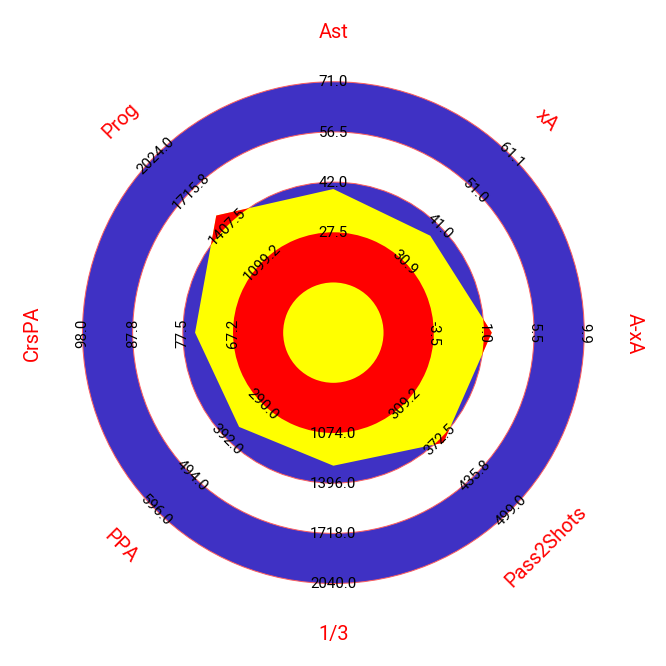

In [64]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#3F31C4', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(values, ax=ax,
                                kwargs_radar={'facecolor': '#ffff00'},
                                kwargs_rings={'facecolor': '#ff0000'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=20,
                                       fontproperties=robotto_regular.prop,color='#ff0000')  # draw the param labels